In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
bias = 100
X, y, coef = make_regression(n_features=1, bias = bias, noise=10, coef=True, random_state=42)

In [3]:
X.shape, y.shape

((100, 1), (100,))

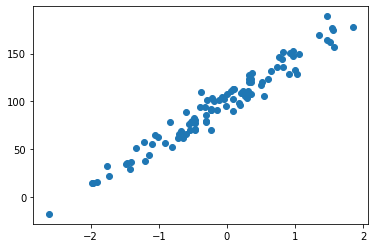

In [4]:
plt.scatter(X,y)

In [5]:
coef, bias # m and c from sklearn

(array(41.74110031), 100)

In [6]:
y_gen = X * coef +bias # equation of line. y = mx+c, where m=coef and c=bias

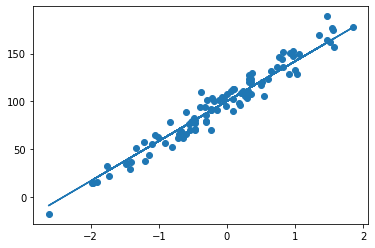

In [7]:
plt.scatter(X,y)
# This is the line according to sklearn
# We provided c here and m was returned by sklearn
plt.plot(X,y_gen)

In [8]:
# Now, we will plot line using Linear Regression
# and see how much it resembles the line provided by sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X,y)
# work during training> Figuring out m and c

LinearRegression()

In [12]:
# underscore after indicates that this variable was not initially present
# created after training
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

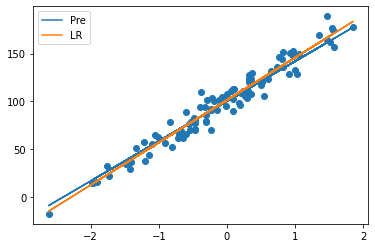

In [13]:
plt.scatter(X,y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X,model.predict(X),label="LR")
# a legend is an area of a chart describing each of the parts of the chart. 
plt.legend()

## Custom Linear Regression

In [14]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
        
    def fit(self,X,y):
        self._X = X  #_x mock behaviour like private
        self._y = y.reshape(-1,1) # reshape to 2d array. -1 => any number of rows, 1=> one column
        
        # Need to figure out value of coefficient and bias
        # Step 1: Pick these values at random values
        self.coef_ = np.random.random()
        self.intercept_ =np.random.random()
        
        # Gradient descent
        errors = []
        
        # How many times? Lets do this 50 times
        # Each timevalue of m and c will change i.e. We will descend
        for i in range(50):
            self.gradient_descend()
            errors.append(self.error())
            
        return errors

    def gradient_descend(self):
        # Change in coeff and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -=d_intercept * self.lr
        
    def gradient(self):
        yh = self.predict(self._X)  # From predict function
        d_coef = ((yh - self._y) * self._X).mean()  # For each and every point
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_  # This thig applied to entire array
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [15]:
model = LinearRegCustom(lr=0.1)

In [16]:
errors = model.fit(X,y)

In [17]:
model.coef_, model.intercept_

(43.264204467265884, 100.29929023664444)

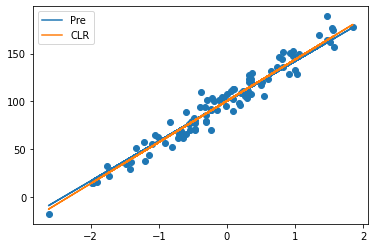

In [18]:
plt.scatter(X,y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

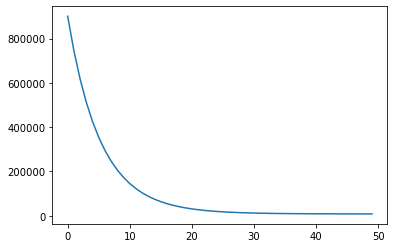

In [19]:
# errors decreased over 50 iterations
plt.plot(errors)

In [20]:
model.error()

7973.122179856709

In [21]:
# Now with different learning rate
model = LinearRegCustom(lr=15)

In [22]:
errors = model.fit(X,y)

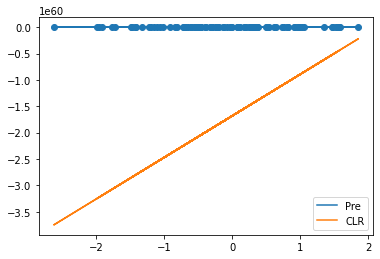

In [23]:
plt.scatter(X,y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

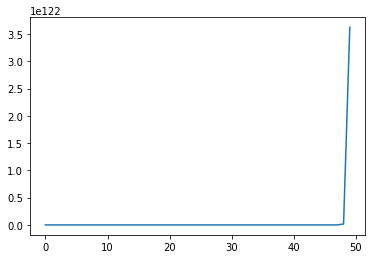

In [24]:
plt.plot(errors)

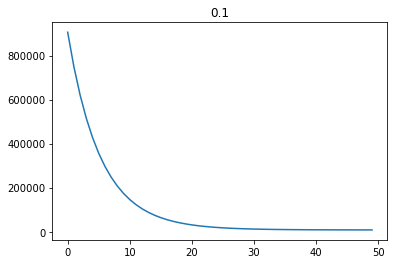

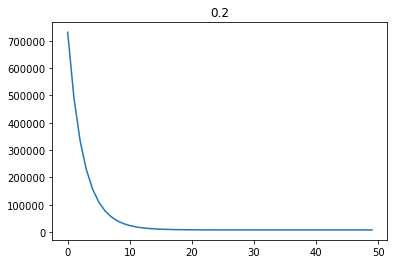

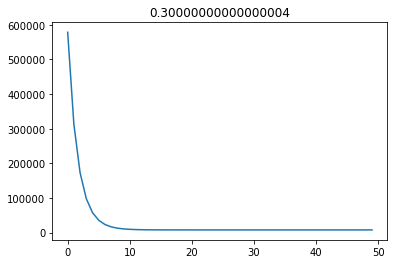

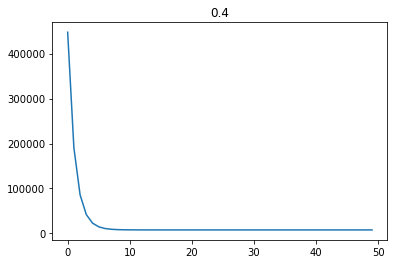

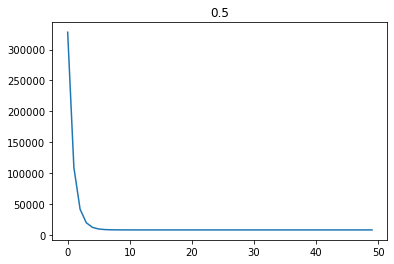

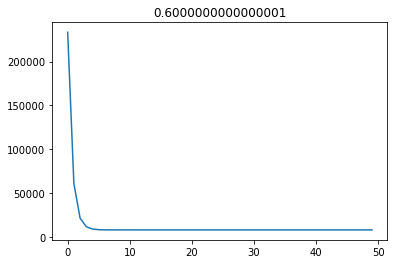

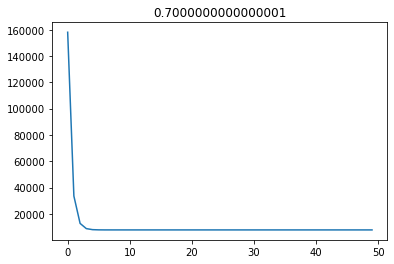

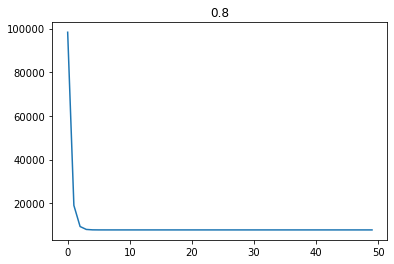

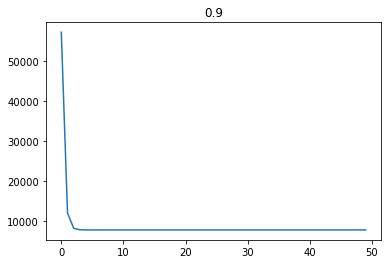

In [25]:
# Choosing best learning rate
for i in range(1, 10):
    model = LinearRegCustom(lr=0.1 * i)
    errors = model.fit(X,y)
    plt.figure()
    plt.title(str(0.1 * i))
    plt.plot(errors)

## Housing Problem

In [26]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
X, y = load_boston(return_X_y=True)

In [28]:
boston = load_boston()

In [29]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.predict(X_test[:1])

array([28.53469469])

In [33]:
X_test

array([[9.17800e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.95500e+02, 9.04000e+00],
       [5.64400e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.96900e+02, 3.53000e+00],
       [1.05740e-01, 0.00000e+00, 2.77400e+01, ..., 2.01000e+01,
        3.90110e+02, 1.80700e+01],
       ...,
       [7.61620e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.92400e+02, 1.04500e+01],
       [1.00245e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.80230e+02, 1.19800e+01],
       [5.20140e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.86860e+02, 5.91000e+00]])

In [34]:
X_test[:1]

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]])

## Salary

In [35]:
dataset = pd.read_csv('./datasets/Salary_Data.csv')

In [36]:
dataset.head(n=10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [37]:
# All rows, all columns but last
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
model.predict(X_test[:5])

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028])

In [42]:
y_test[:5]

array([112635.,  67938., 113812.,  83088.,  64445.])

In [43]:
model.score(X_test, y_test)

0.9553063138044949

In [44]:
yrs = int(input("How many yrs of experience do you have: "))
sal = model.predict(np.array([yrs]).reshape(-1, 1))
print("\nYour estimated salary is $", round(sal[0], 3))

How many yrs of experience do you have:  45



Your estimated salary is $ 449496.08
